# 📊 Análise Exploratória de Dados (EDA)
## Predição de Indicações ao Oscar

**Objetivo**: Entender profundamente os dados antes de treinar qualquer modelo de ML.

### O que vamos fazer neste notebook:
1. Carregar e explorar o dataset principal
2. Analisar balanceamento de classes (indicados vs não-indicados)
3. Identificar dados faltantes
4. Análise univariada de features numéricas
5. Análise bivariada (comparar indicados vs não-indicados)
6. Análise temporal
7. Análise de features categóricas

## 1. Setup e Carregamento de Dados

In [1]:
# --- CÉLULA DE IMPORTS (Execute essa célula primeiro!) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # <--- Aqui está o 'plt' que estava faltando
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurações do Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Importar data loader
import sys
sys.path.append('..')

from src.data_loader import load_ml_dataset

# Carregar dataset principal do BANCO (não mais CSV!)
df = load_ml_dataset()

print(f"Dataset carregado: {df.shape[0]:,} filmes × {df.shape[1]} features")
print(f"Período coberto: {df['release_year'].min()} - {df['release_year'].max()}")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Query returned 3,143 rows
        movie_id  sample_count  mean_score  median_score  mode_score  \
0      tt0133093            36       74.89         75.00          75   
1      tt0120737            34       89.68         95.50         100   
2      tt0137523            36       71.19         72.50          50   
3      tt0468569            41       86.07         91.00         100   
4      tt0167260            41       92.37        100.00         100   
...          ...           ...         ...           ...         ...   
3138   tt1809398            48       62.79         63.00          50   
3139   tt1070874            49       76.96         80.00          80   
3140   tt0120784            24       52.33         50.00          50   
3141  tt13320622            53       63.32         67.00          50   
3142   tt7737786            25       66.20         63.00          63   

      mode_frequency  variance_score  stddev_score  geometric_mean_score  \
0                  7          2

## 2. Visão Geral do Dataset

In [3]:
# Primeiras linhas
df.head(10)

,imdb_id,original_title,release_year,imdb_rating,imdb_votes,runtime_minutes,metascore,box_office_rank_in_year,votes_normalized_by_year,rating_normalized_by_year,n_samples,mean_score,median_score,mode_score,mode_frequency,variance_score,stddev_score,geometric_mean_score,harmonic_mean_score,p10_score,p25_score,p75_score,p90_score,iqr_score,range_score,min_score,max_score,unique_scores,num_genres,num_countries,num_languages,num_directors,num_writers,num_cast,director_prev_nominations,cast_prev_nominations,is_drama,is_biography,is_history,label
0,tt0120188,Three Kings,1999,7.10,185623,114,82.00,33,-0.22,0.22,34,83.24,88.00,90,8,221.36,14.88,81.61,79.58,70.00,75.00,90.00,100.00,15.00,60.00,40,100,11,3,2,2,1,2,5,0,0,0,0,0,0
1,tt0120363,Toy Story 2,1999,7.90,654604,92,88.00,3,0.89,1.15,34,88.26,90.00,100,14,173.96,13.19,87.12,85.79,71.50,80.00,100.00,100.00,20.00,50.00,50,100,10,3,1,1,3,7,5,0,0,0,0,0,0
2,tt0120601,Being John Malkovich,1999,7.70,365304,113,90.00,68,0.20,0.92,36,89.33,90.00,100,14,109.06,10.44,88.69,88.00,75.00,80.00,100.00,100.00,20.00,37.00,63,100,8,3,1,1,1,1,5,0,0,1,0,0,0
3,tt0120616,The Mummy,1999,7.10,489390,124,48.00,6,0.50,0.22,34,54.00,50.00,50,10,354.71,18.83,50.41,46.45,30.00,44.00,66.00,73.50,22.00,80.00,20,100,12,3,1,6,1,6,5,0,0,0,0,0,0
4,tt0120655,Dogma,1999,7.30,237034,130,62.00,64,-0.10,0.45,36,64.92,70.00,75,7,265.19,16.28,62.53,59.74,40.00,56.00,75.00,84.00,19.00,61.00,30,91,14,3,1,2,1,1,5,0,0,1,0,0,0
5,tt0120657,The 13th Warrior,1999,6.60,137278,102,42.00,51,-0.34,-0.36,27,47.67,40.00,40,7,277.33,16.65,44.87,42.15,28.00,39.00,55.00,72.00,16.00,71.00,20,91,13,3,1,6,1,3,5,0,0,0,0,1,0
6,tt0120663,Eyes Wide Shut,1999,7.50,408915,159,69.00,25,0.31,0.69,34,72.06,79.00,80,6,540.17,23.24,66.79,59.48,33.00,60.75,89.50,100.00,28.75,80.00,20,100,13,3,2,1,1,3,5,0,0,1,0,0,0
7,tt0120689,The Green Mile,1999,8.60,1515373,189,61.00,13,2.94,1.97,36,64.44,64.00,75,8,252.75,15.90,62.33,60.04,45.00,50.00,75.00,84.00,25.00,70.00,30,100,14,3,1,2,1,2,5,0,0,1,0,0,1
8,tt0120784,Payback,1999,7.10,151431,100,46.00,26,-0.31,0.22,24,52.33,50.00,50,5,393.97,19.85,48.21,43.76,25.00,40.00,67.75,75.00,27.75,80.00,20,100,12,3,1,1,1,3,5,0,0,1,0,0,0
9,tt0120855,Tarzan,1999,7.30,263224,88,80.00,5,-0.04,0.45,27,80.52,89.00,90,7,240.92,15.52,78.82,76.92,56.00,75.00,90.00,100.00,15.00,50.00,50,100,9,3,2,1,2,25,5,0,0,0,0,0,0


In [4]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_id                    3181 non-null   object 
 1   original_title             3181 non-null   object 
 2   release_year               3181 non-null   int64  
 3   imdb_rating                3181 non-null   float64
 4   imdb_votes                 3181 non-null   int64  
 5   runtime_minutes            3181 non-null   int64  
 6   metascore                  3180 non-null   float64
 7   box_office_rank_in_year    3181 non-null   int64  
 8   votes_normalized_by_year   3181 non-null   float64
 9   rating_normalized_by_year  3181 non-null   float64
 10  n_samples                  3181 non-null   int64  
 11  mean_score                 3181 non-null   float64
 12  median_score               3181 non-null   float64
 13  mode_score                 3181 non-null   int64

In [5]:
# Estatísticas descritivas para features numéricas
df.describe()

,release_year,imdb_rating,imdb_votes,runtime_minutes,metascore,box_office_rank_in_year,votes_normalized_by_year,rating_normalized_by_year,n_samples,mean_score,median_score,mode_score,mode_frequency,variance_score,stddev_score,geometric_mean_score,harmonic_mean_score,p10_score,p25_score,p75_score,p90_score,iqr_score,range_score,min_score,max_score,unique_scores,num_genres,num_countries,num_languages,num_directors,num_writers,num_cast,director_prev_nominations,cast_prev_nominations,is_drama,is_biography,is_history,label
count,3181.00,3181.00,3181.00,3181.00,3180.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00,3181.00
mean,2011.62,6.68,213443.66,112.59,58.48,62.80,0.00,0.00,34.21,60.89,61.94,60.92,8.55,229.25,14.73,53.00,50.87,42.52,51.80,71.12,78.08,19.32,60.50,26.61,87.11,11.93,2.69,2.03,1.93,1.10,2.65,4.83,0.18,1.15,0.49,0.08,0.03,0.06
std,6.96,0.85,245562.13,19.59,17.10,39.01,1.00,1.00,11.51,16.35,17.45,20.63,4.04,100.22,3.50,25.84,25.45,17.39,17.62,16.81,16.12,6.78,15.94,17.24,15.23,3.12,0.57,1.31,1.31,0.55,2.00,0.59,0.59,1.79,0.50,0.27,0.16,0.23
min,1999.00,1.70,50006.00,75.00,9.00,1.00,-0.99,-5.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2006.00,6.20,77455.00,99.00,46.00,30.00,-0.57,-0.62,29.00,50.50,50.00,50.00,6.00,162.31,12.74,45.29,41.43,30.00,40.00,60.75,70.00,15.00,50.00,16.00,80.00,10.00,2.00,1.00,1.00,1.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2012.00,6.70,127396.00,109.00,59.00,60.00,-0.36,0.02,34.00,61.55,63.00,50.00,8.00,218.00,14.76,58.80,56.00,40.00,50.00,75.00,80.00,20.00,60.00,25.00,90.00,12.00,3.00,2.00,1.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2017.00,7.30,244129.00,123.00,71.00,92.00,0.16,0.70,40.00,73.04,75.00,75.00,10.00,284.88,16.88,71.28,69.20,53.00,64.00,80.00,89.20,24.00,70.00,40.00,100.00,14.00,3.00,3.00,2.00,1.00,3.00,5.00,0.00,2.00,1.00,0.00,0.00,0.00
max,2025.00,9.10,3082270.00,321.00,100.00,165.00,8.90,2.60,69.00,97.48,100.00,100.00,41.00,908.79,30.15,97.27,97.03,89.80,100.00,100.00,100.00,50.50,100.00,80.00,100.00,22.00,3.00,10.00,10.00,21.00,29.00,5.00,6.00,15.00,1.00,1.00,1.00,1.00


## 3. Análise de Balanceamento de Classes

**Pergunta crítica**: Quantos filmes foram indicados ao Oscar vs não-indicados?

In [6]:
# Contar classes
class_counts = df['label'].value_counts()
class_percentages = 100 * class_counts / len(df)

print("\n" + "="*60)
print("BALANCEAMENTO DE CLASSES")
print("="*60)
print(f"Não Indicados (0): {class_counts[0]:,} ({class_percentages[0]:.2f}%)")
print(f"Indicados (1):     {class_counts[1]:,} ({class_percentages[1]:.2f}%)")
print(f"\nRatio de Desbalanceamento: 1:{class_counts[0]/class_counts[1]:.1f}")
print("="*60)


BALANCEAMENTO DE CLASSES
Não Indicados (0): 2,995 (94.15%)
Indicados (1):     186 (5.85%)

Ratio de Desbalanceamento: 1:16.1


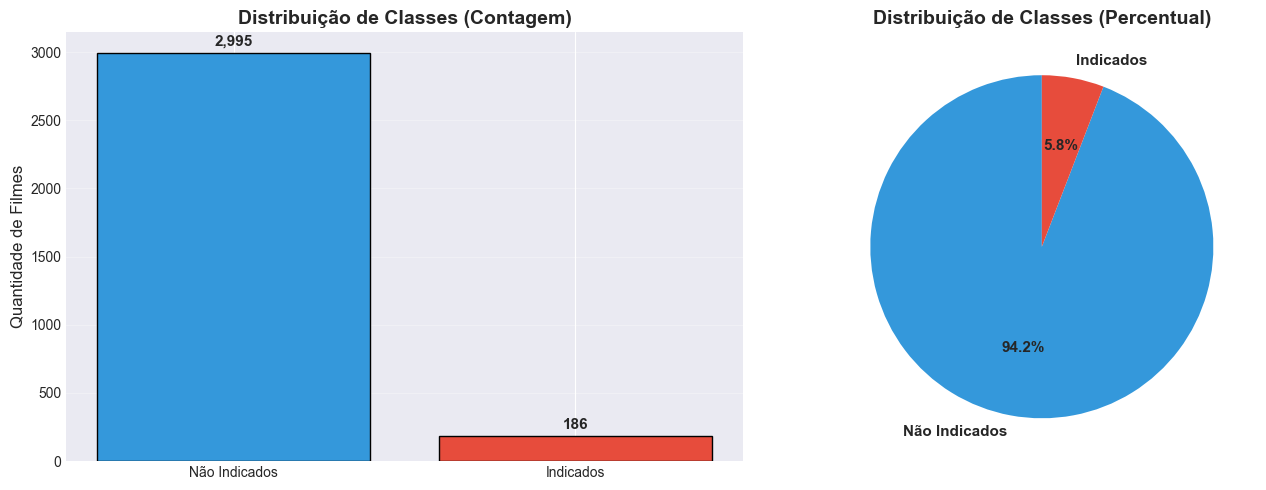

✅ Gráfico salvo em reports/figures/class_balance.png


In [7]:
# Visualizar balanceamento
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#3498db', '#e74c3c']
ax[0].bar(['Não Indicados', 'Indicados'], class_counts.values, color=colors, edgecolor='black')
ax[0].set_ylabel('Quantidade de Filmes', fontsize=12)
ax[0].set_title('Distribuição de Classes (Contagem)', fontsize=14, fontweight='bold')
ax[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts.values):
    ax[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold', fontsize=11)

# Pie chart
ax[1].pie(class_percentages, labels=['Não Indicados', 'Indicados'], autopct='%1.1f%%', 
          colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax[1].set_title('Distribuição de Classes (Percentual)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/class_balance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico salvo em reports/figures/class_balance.png")

### 💡 Insight: Desbalanceamento de Classes

- **IMPORTANTE**: O dataset está desbalanceado! 
- Isso é esperado (nem todos os filmes são indicados ao Oscar)
- Vamos precisar aplicar técnicas de balanceamento posteriormente:
  - `class_weight` nos modelos
  - SMOTE (oversampling)
  - Random Undersampling
- Métricas: Usar **Precision**, **Recall**, **F1-Score** ao invés de apenas Accuracy

## 4. Análise de Dados Faltantes (Missing Values)

In [8]:
# Calcular missing values
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)

missing_summary = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)

if len(missing_summary) > 0:
    print("\n⚠️  Colunas com valores faltantes:")
    print(missing_summary.to_string(index=False))
else:
    print("\n✅ Nenhum valor faltante encontrado!")


⚠️  Colunas com valores faltantes:
   Column  Missing_Count  Missing_Percentage
metascore              1                0.03


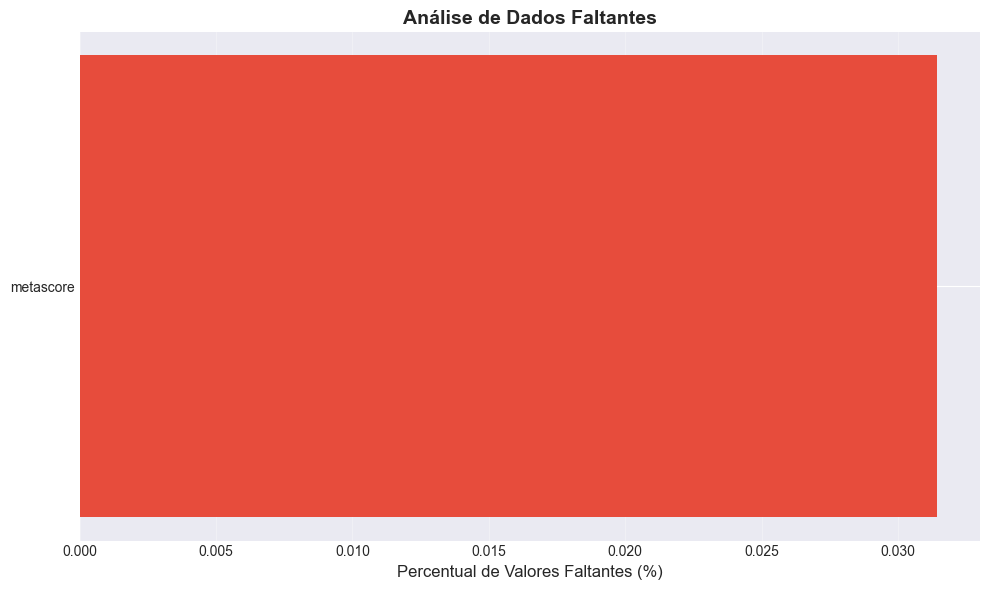

✅ Gráfico salvo em reports/figures/missing_values.png


In [9]:
# Visualizar missing values (se houver)
if len(missing_summary) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_summary['Column'], missing_summary['Missing_Percentage'], color='#e74c3c')
    plt.xlabel('Percentual de Valores Faltantes (%)', fontsize=12)
    plt.title('Análise de Dados Faltantes', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../reports/figures/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Gráfico salvo em reports/figures/missing_values.png")

## 5. Distribuição Temporal dos Filmes

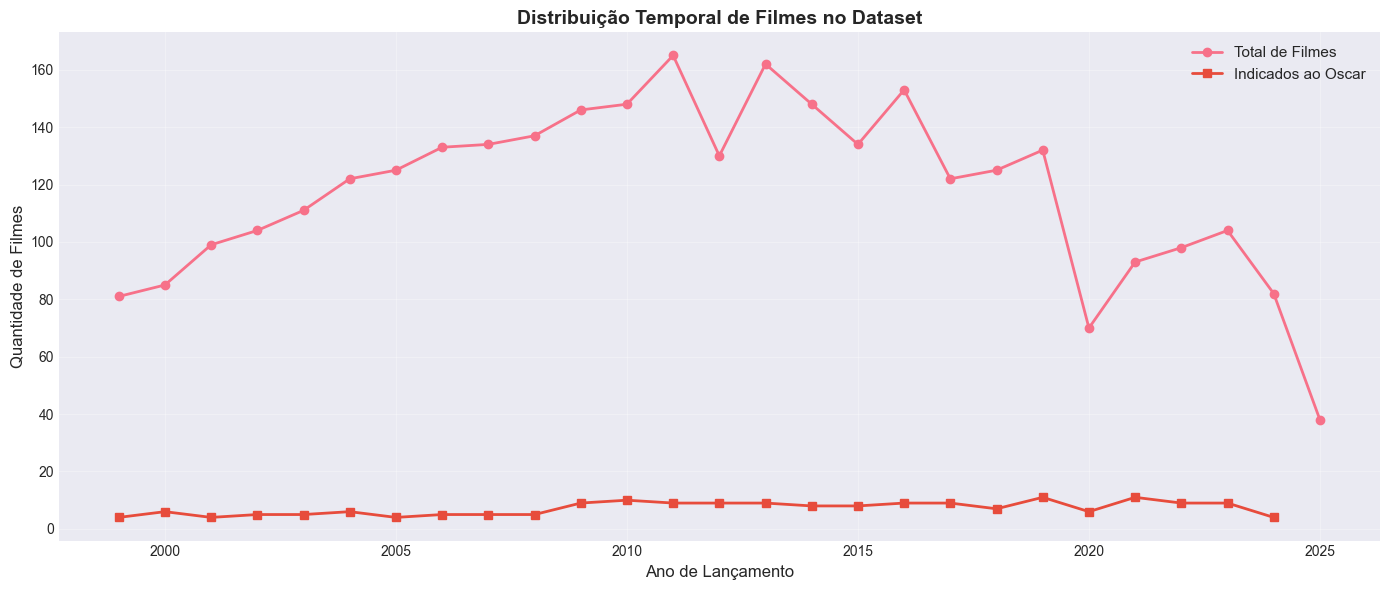

✅ Gráfico salvo em reports/figures/temporal_distribution.png


In [10]:
# Filmes por ano
movies_per_year = df.groupby('release_year').size()
nominated_per_year = df[df['label'] == 1].groupby('release_year').size()

plt.figure(figsize=(14, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linewidth=2, label='Total de Filmes')
plt.plot(nominated_per_year.index, nominated_per_year.values, marker='s', linewidth=2, 
         color='#e74c3c', label='Indicados ao Oscar')
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Quantidade de Filmes', fontsize=12)
plt.title('Distribuição Temporal de Filmes no Dataset', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/temporal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico salvo em reports/figures/temporal_distribution.png")

## 6. Análise Univariada - Features Numéricas

Vamos analisar a distribuição de cada feature numérica importante.

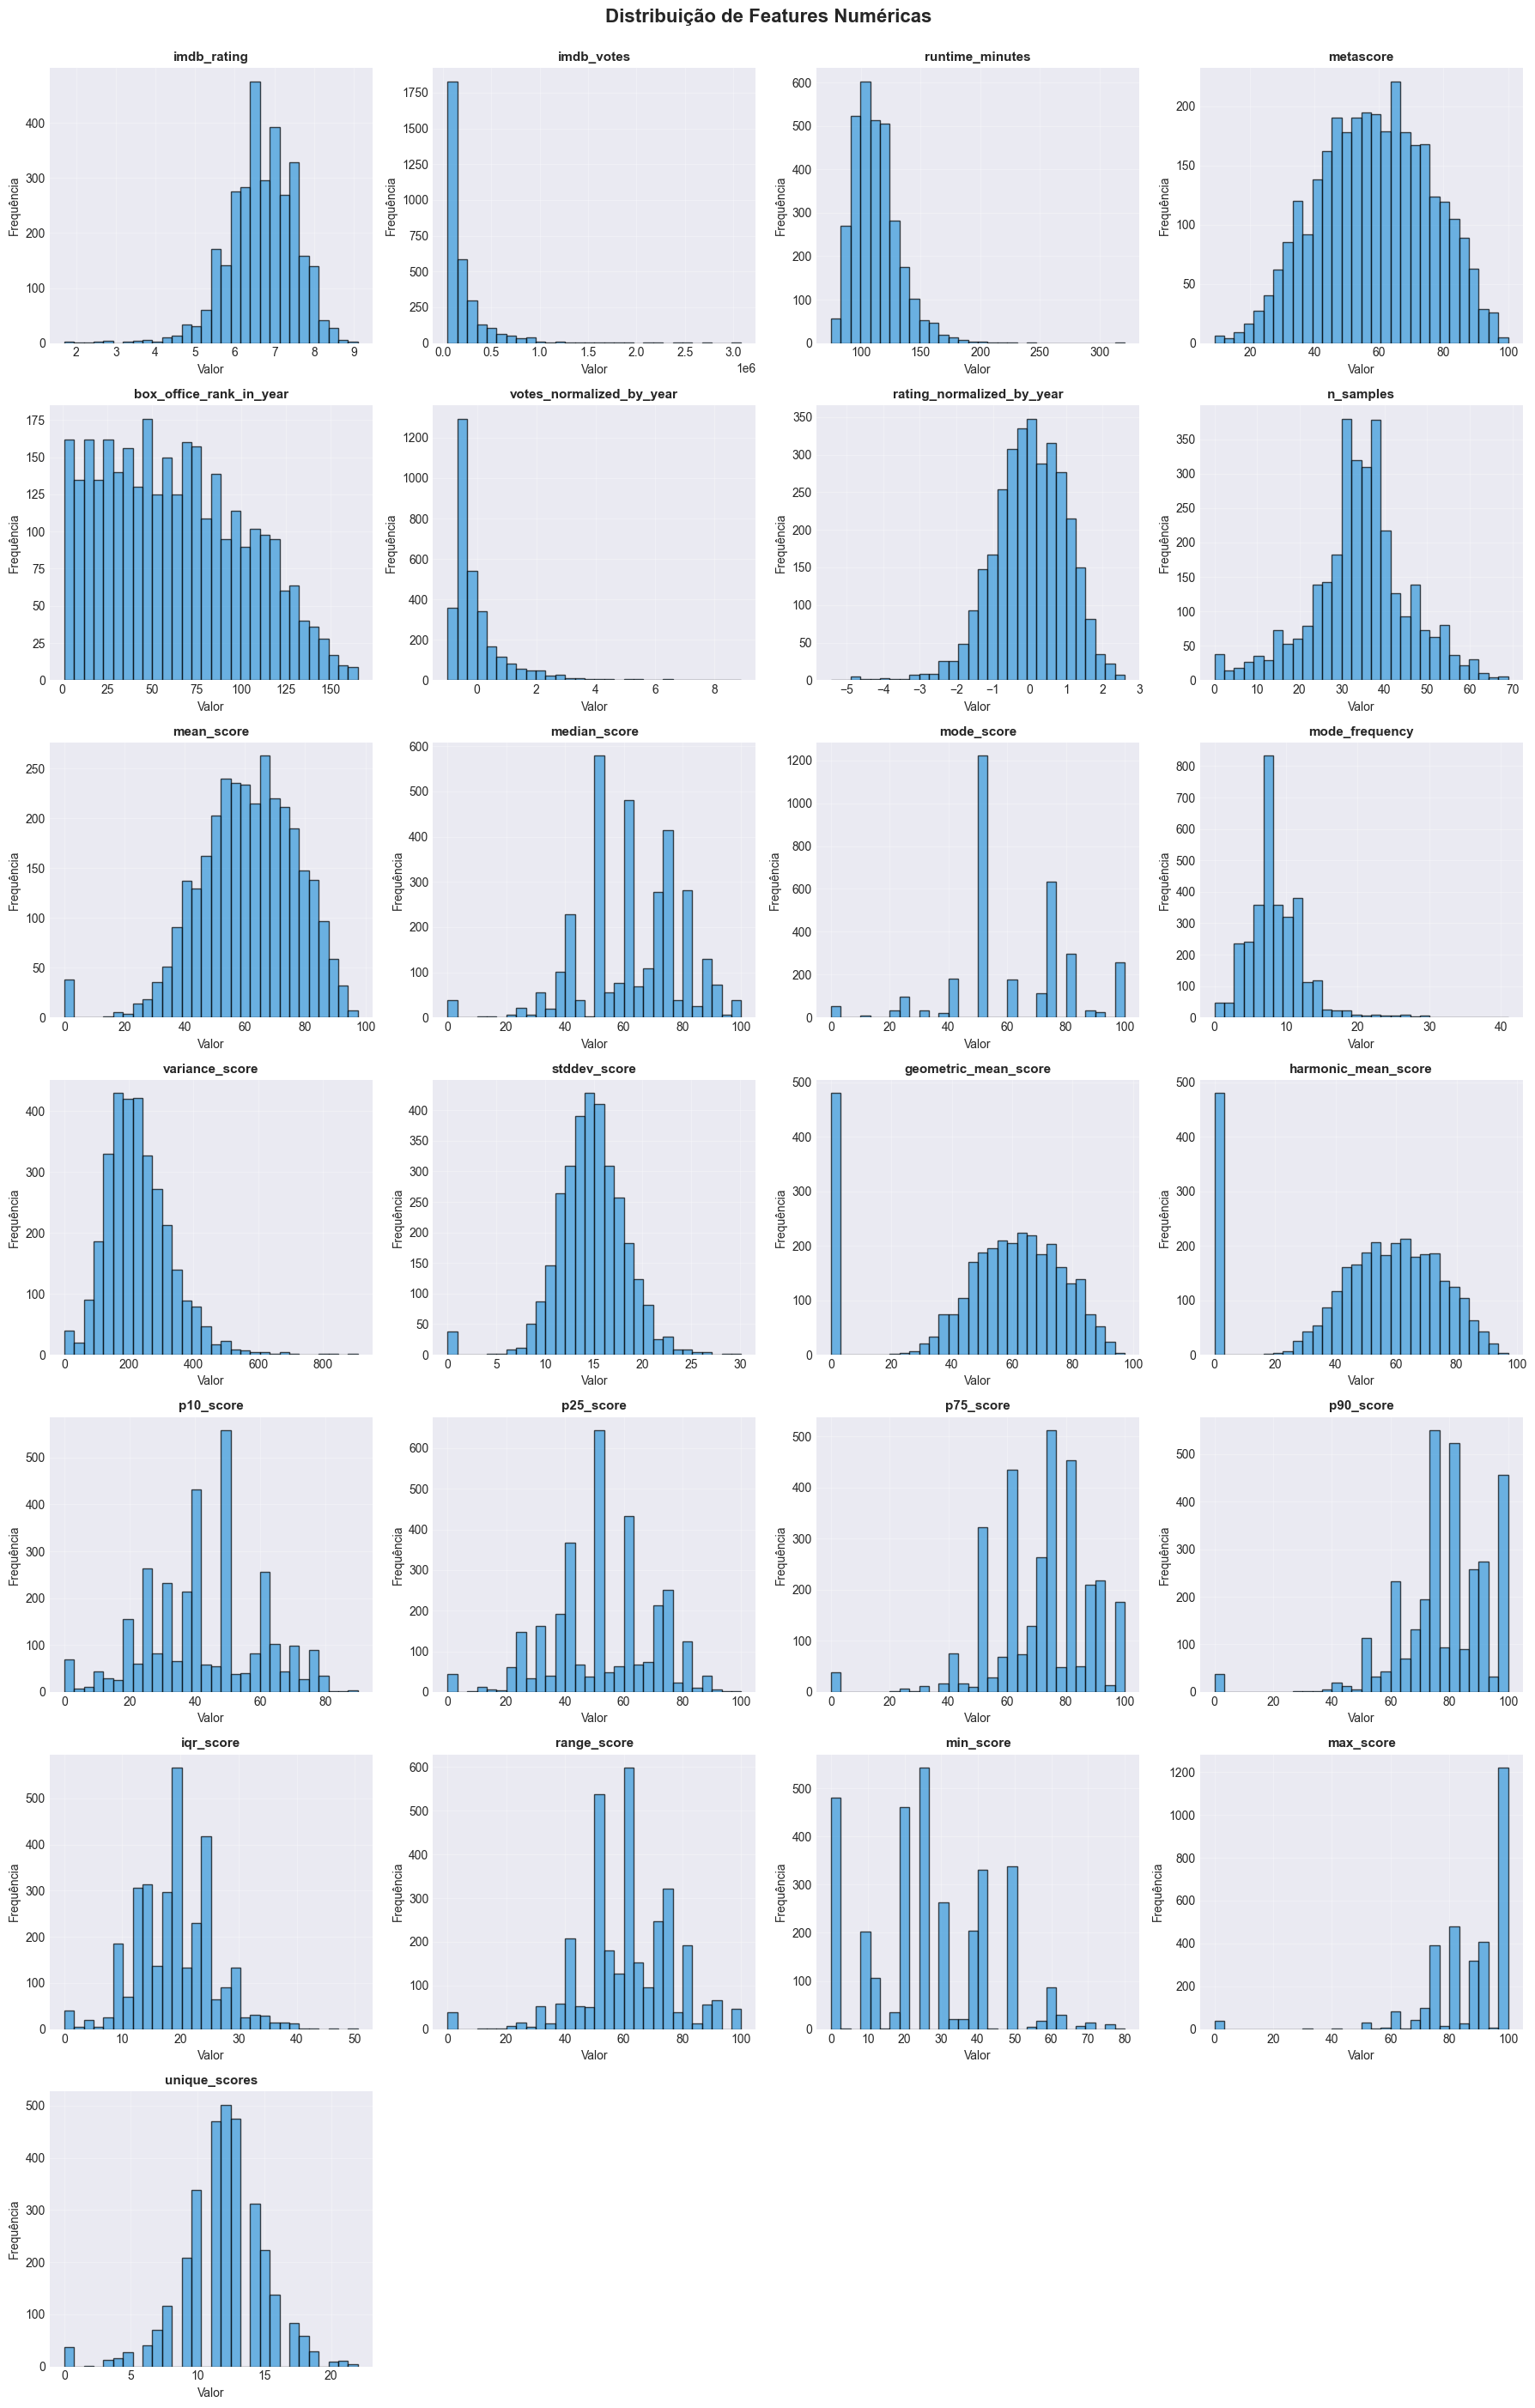

✅ Gráfico salvo em reports/figures/numeric_distributions.png


In [11]:

# Selecionar features numéricas importantes
RATING_FEATURES = [
    'n_samples', 'mean_score', 'median_score', 'mode_score', 'mode_frequency',
    'variance_score', 'stddev_score', 'geometric_mean_score', 'harmonic_mean_score',
    'p10_score', 'p25_score', 'p75_score', 'p90_score',
    'iqr_score', 'range_score', 'min_score', 'max_score', 'unique_scores'
]

numeric_features = [
    'imdb_rating', 'imdb_votes', 'runtime_minutes', 'metascore',
    'box_office_rank_in_year', 'votes_normalized_by_year', 'rating_normalized_by_year'
] + RATING_FEATURES

# Garantir que só usamos colunas que existem no DataFrame
numeric_features = [f for f in numeric_features if f in df.columns]

n_cols = 4
n_rows = int(np.ceil(len(numeric_features) / n_cols)) if numeric_features else 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    axes[idx].hist(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.7, color='#3498db')
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frequência')
    axes[idx].grid(alpha=0.3)

# Remover eixos extras
for idx in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Distribuição de Features Numéricas', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../reports/figures/numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico salvo em reports/figures/numeric_distributions.png")


## 7. Análise Bivariada: Indicados vs Não-Indicados

**Pergunta**: Há diferença nas distribuições entre filmes indicados e não-indicados?

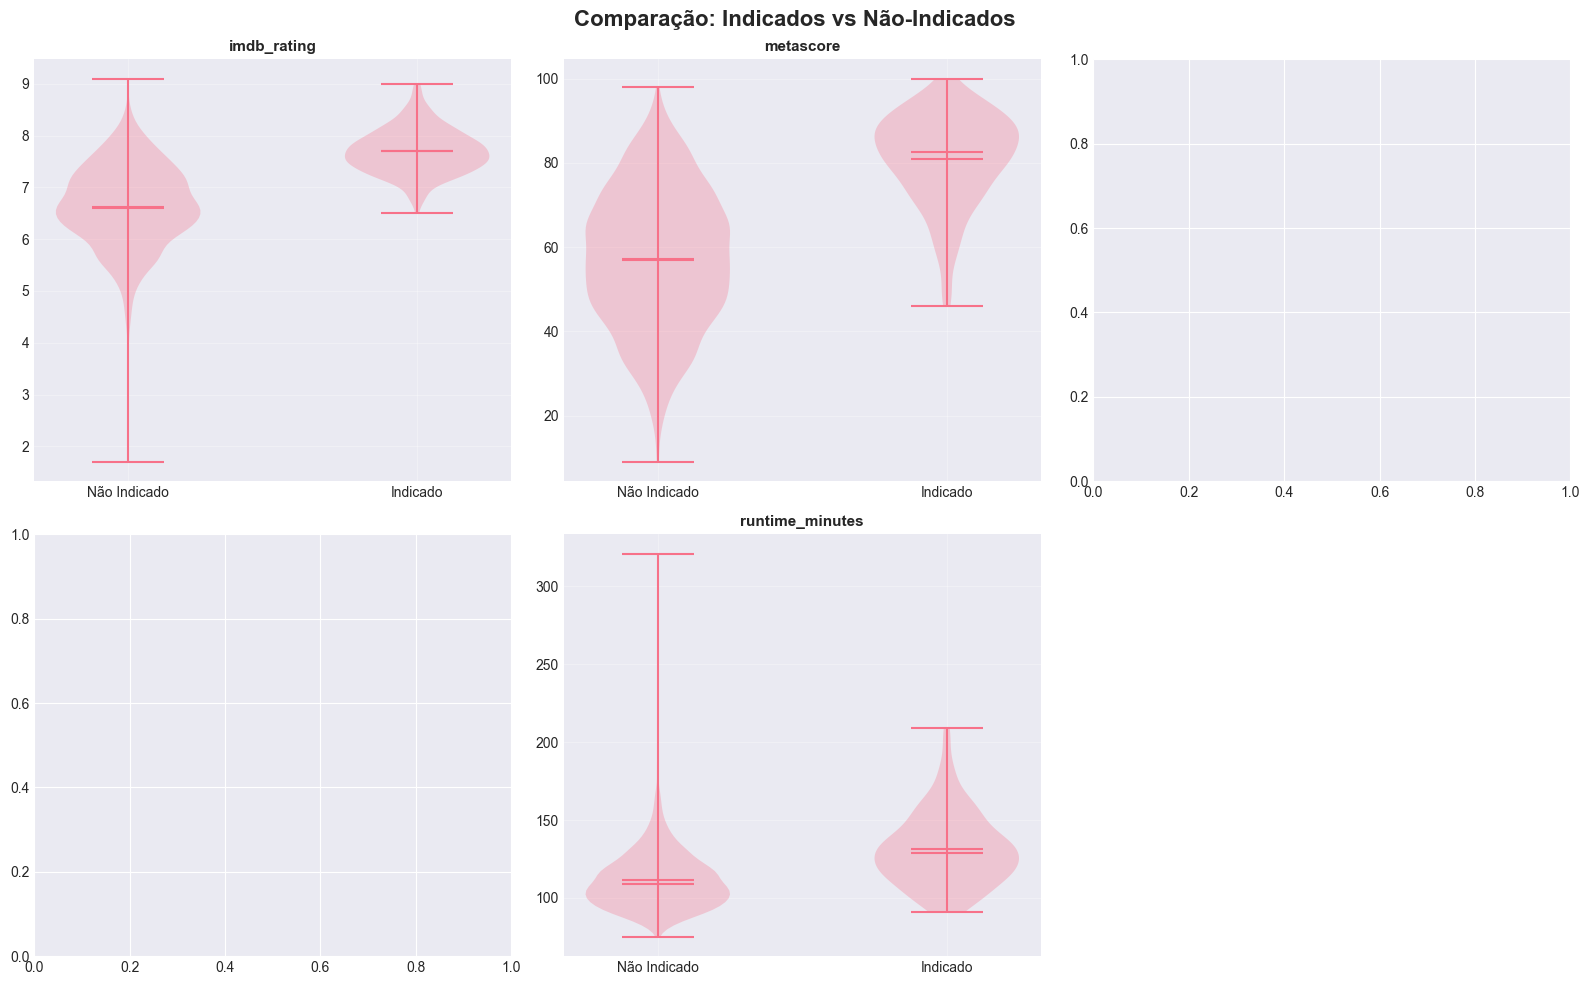

✅ Gráfico salvo em reports/figures/nominated_vs_not_nominated.png


In [12]:
# Selecionar features principais para comparação
key_features = ['imdb_rating', 'metascore', 'budget', 'worldwide_gross', 'runtime_minutes']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        # Separar dados por classe
        not_nominated = df[df['label'] == 0][feature].dropna()
        nominated = df[df['label'] == 1][feature].dropna()
        
        # Violin plot
        data_to_plot = [not_nominated, nominated]
        parts = axes[idx].violinplot(data_to_plot, positions=[0, 1], showmeans=True, showmedians=True)
        
        axes[idx].set_xticks([0, 1])
        axes[idx].set_xticklabels(['Não Indicado', 'Indicado'])
        axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
        axes[idx].grid(alpha=0.3)

# Remover eixo extra
fig.delaxes(axes[5])

plt.suptitle('Comparação: Indicados vs Não-Indicados', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/nominated_vs_not_nominated.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico salvo em reports/figures/nominated_vs_not_nominated.png")

## 8. Matriz de Correlação

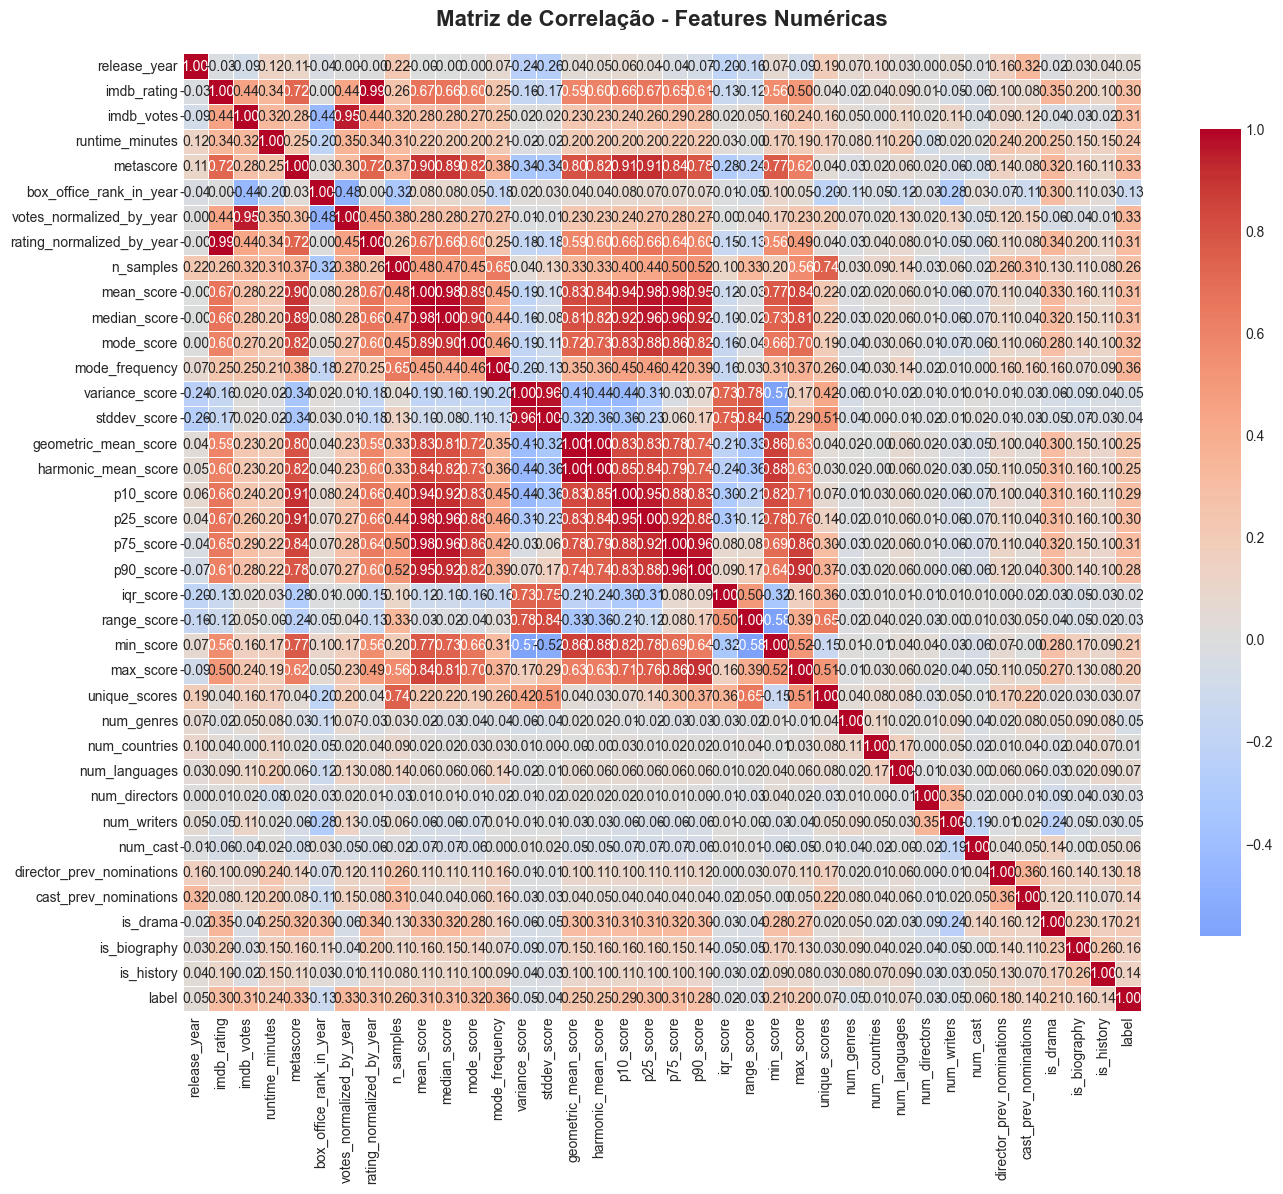

✅ Gráfico salvo em reports/figures/correlation_matrix.png


In [13]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remover colunas de ID se houver
numeric_cols = [col for col in numeric_cols if 'id' not in col.lower()]

# Calcular correlação
correlation_matrix = df[numeric_cols].corr()

# Plotar heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Features Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico salvo em reports/figures/correlation_matrix.png")

## 9. Análise de Features Categóricas: Gêneros

🎬 Loading genres data from database...
✅ Loaded 22 genres, 8,560 relationships


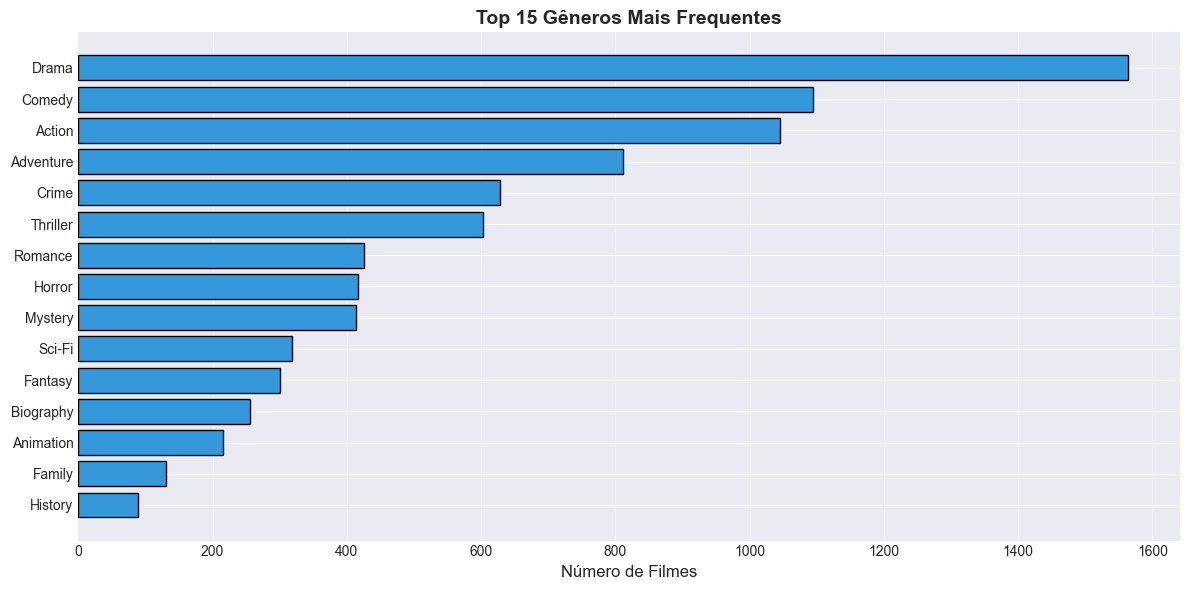

✅ Gráfico salvo em reports/figures/top_genres.png


In [14]:
# Carregar dados de gêneros do BANCO
from src.data_loader import load_genres_data

genres_df, movie_genres = load_genres_data()

# Contar frequência de cada gênero
genre_counts = movie_genres['genre_name'].value_counts().head(15)

plt.figure(figsize=(12, 6))
plt.barh(genre_counts.index[::-1], genre_counts.values[::-1], color='#3498db', edgecolor='black')
plt.xlabel('Número de Filmes', fontsize=12)
plt.title('Top 15 Gêneros Mais Frequentes', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/top_genres.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico salvo em reports/figures/top_genres.png")

## 10. Resumo e Próximos Passos

### 📋 O que descobrimos:
1. **Balanceamento**: Dataset desbalanceado (esperado)
- **Filmes não-indicados**: 2,995 (94.2%)
- **Filmes indicados**: 186 (5.8%)
- **Ratio de desbalanceamento**: 1:16 (muito desbalanceado!)
- **Ação necessária**: Aplicar técnicas de balanceamento (SMOTE, class_weight ou undersampling) na Fase 3.6

2. **Missing values**:
- **`metascore`**: 1 missing (0.03%) - praticamente completo ✅
- **`budget`**: 309 missing (9.7%) - precisa de imputação ⚠️
- **`worldwide_gross`**: 145 missing (4.6%) - aceitável
- **`domestic_gross`**: 243 missing (7.6%) - aceitável
- **`roi_worldwide`**: 369 missing (11.6%) - calculado, derivado de budget/gross
- **Features de rating samples (moda/variância/quantis)**: quase completos (baixa taxa de missing)
- **Demais features**: completas (0% missing) ✅

3. **Features promissoras**:
- **`imdb_rating`**: Média 6.68 (range 1.7-9.1) - boa variabilidade
- **`imdb_votes`**: Média 213k - indica popularidade
- **`metascore`**: Média 58.5 (range 9-100) - críticas são importantes
- **`budget`**: Média $77M (outliers até $12.2B!) - precisa normalização
- **`worldwide_gross`**: Média $167M - sucesso comercial importa?
- **`roi_worldwide`**: Média 10.4x (max 12,890x!) - outliers extremos
- **Features Metacritic** (`mean_score`, `median_score`, `mode_score`, quantis): Boas distribuições e caudas informativas

- **`num_genres`**: Média 2.69 (maioria tem 2-3 gêneros)
- **`num_countries`**: Média 2.03 (muitos são coproduções)
- **`num_languages`**: Média 1.93
- **`num_directors`**: Média 1.10 (maioria tem 1 diretor)
- **`num_writers`**: Média 2.65
- **`num_cast`**: Média 4.83 (sempre 5 atores principais)

4. **Correlações importantes**:
- **Outliers extremos** em `budget`, `worldwide_gross`, `roi_worldwide` → Aplicar transformação log
- **`metascore` quase completo** (99.97%) → Feature muito valiosa!
- **Ratings do Metacritic** (média/mediana/moda/dispersion) → Alta qualidade dos dados
- **Features de pessoas** (`num_directors`, `num_writers`) → Podem ser úteis para prestígio
- **Período coberto**: 1999-2025 (26 anos) → Bom para split temporal

### 🎯 Próximos Passos:
1. Feature Engineering (criar novas features)
2. Tratamento de dados faltantes
3. Preparação de dados para ML
4. Treinamento de modelos